In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import pandas as pd
import csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from shapely.geometry import Polygon
from shapely.geometry import Point

In [2]:
def regression(x_input,y_input):
    fit=np.empty((len(y_input),len(y_input[0])))
    regrmatrix=np.empty((2,len(y_input[0])))
    for n in range (0,len(y_input[0]),1):
        x=np.log10(abs(x_input))
        x=x.reshape(len(x),1)
        y=np.log10(abs(y_input[:,n]))
        y=y.reshape(len(y),1)
        regr = LinearRegression()
        regr.fit(x, y)
        regrmatrix[0,n]=regr.coef_
        regrmatrix[1,n]=regr.intercept_
        
        #prediction=relativex[1:len(relativex)]**(regrmatrix[0])
        fit[:,n]=(10**(regrmatrix[1,n]))*x_input.flatten()**(regrmatrix[0,n])
        #fit[:,n]=fit.reshape(len(prediction_stress_data65_04725),1)
        regr.coef_
    return(fit, regrmatrix)

In [3]:
def calculate_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_2.intersection(poly_1).area / poly_1.union(poly_2).area
    proportion=poly_2.area/(poly_1.union(poly_2).area)
    return (iou/proportion)
def impactdensity(name):
    data=pd.read_csv("{}.txt".format(name))
    gridx=np.linspace(0,5,100)
    gridy=np.linspace(0,5,100)
    impactsperpt=np.empty((99,99))
    for n in range (0,len(gridx)-1,1):
        for m in range (0,len(gridy)-1,1):
            runningtotal=0
            for p in range (0,len(data.x),1):
                box=[[gridx[n],gridy[m]],[gridx[n],gridy[m+1]],[gridx[n+1],gridy[m+1]],[gridx[n+1],gridy[m]]]
                circle=Point(data.x[p],data.y[p]).buffer(data.impactdiameter[p]/2)
                intersect=calculate_iou(box,circle)
                if intersect != 0:
                    runningtotal=runningtotal+1
            impactsperpt[m,n]=runningtotal

        print(n)
    return(impactsperpt)

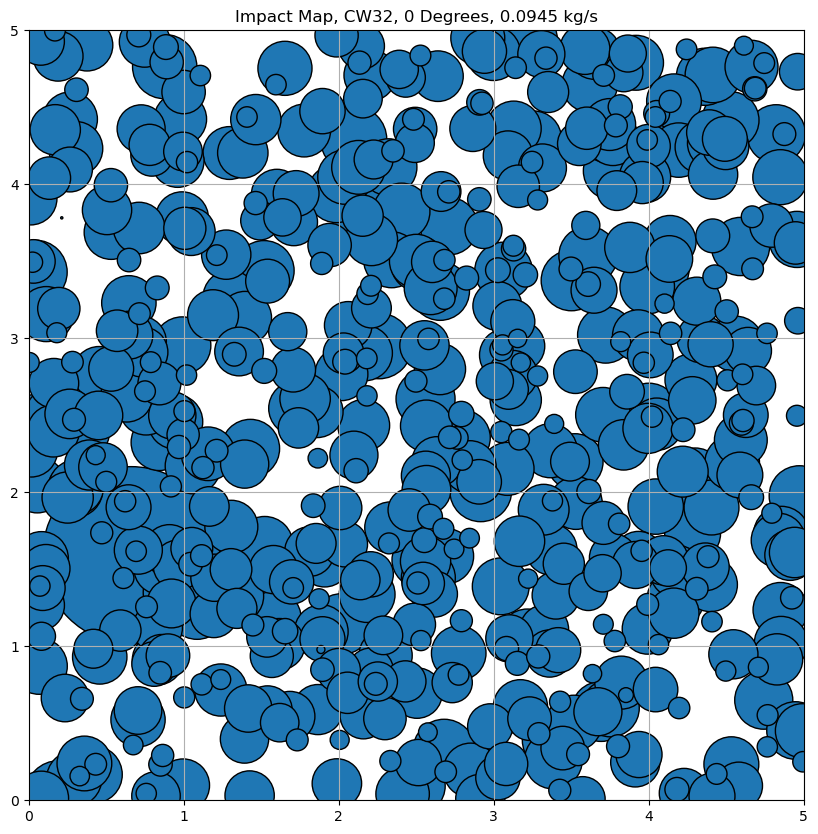

In [4]:
data=pd.read_csv('CW32_0945_20_49100_45000_90.txt')
data=data.sort_values('impactdiameter', ascending=False)
plt.figure(figsize=(10,10))
plt.scatter(data.x,data.y,s=np.pi*(72*data.impactdiameter/2)**2,edgecolors='black', linewidths=1)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.grid()
plt.title('Impact Map, CW32, 0 Degrees, 0.0945 kg/s')
plt.savefig('CW32_0945_20_49100_45000_90')

In [5]:
relativex=np.empty((23,1))
for n in range (1,24,1):
    relativex[n-1]=1/(n**2)

In [7]:
CW32_0945_20_49100_45000_90=np.genfromtxt('CW32_0945_20_49100_45000_90_RSD2.csv', delimiter=',')

CW32_0945_20_49100_45000_90_pred, CW32_0945_20_49100_45000_90_matrix=regression((relativex[1:23]),(CW32_0945_20_49100_45000_90[1:23,:]))


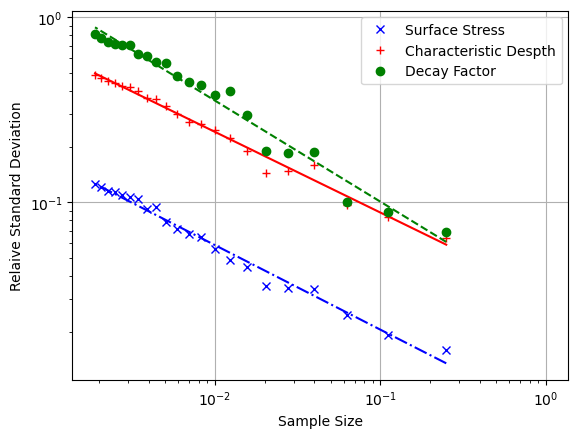

In [8]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Relaive Standard Deviation')
ax.loglog((relativex[0:23]),(-CW32_0945_20_49100_45000_90[0:23,0]),'bx',label='Surface Stress')
ax.loglog((relativex[1:23]),(CW32_0945_20_49100_45000_90_pred[0:22,0]),'b-.')
ax.loglog((relativex[0:23]),(CW32_0945_20_49100_45000_90[0:23,1]),'r+',label='Characteristic Despth')
ax.loglog((relativex[1:23]),(CW32_0945_20_49100_45000_90_pred[0:22,1]),'r')
ax.loglog((relativex[0:23]),(CW32_0945_20_49100_45000_90[0:23,2]),'go',label='Decay Factor')
ax.loglog((relativex[1:23]),(CW32_0945_20_49100_45000_90_pred[0:22,2]),'g--')




ax.grid()
ax.legend(loc='best')
#plt.xlim([1E-2, 2])
#plt.xlabel('Volume Fraction')
#plt.ylabel('Relative Interparticle Spacing')
#plt.savefig('RSD.png')

In [9]:
CW32_0945_20_49100_45000_90_densityplt=impactdensity("CW32_0945_20_49100_45000_90")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


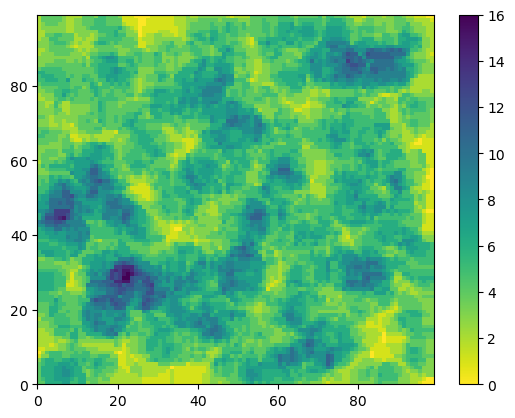

In [10]:
plt.pcolormesh(CW32_0945_20_49100_45000_90_densityplt, cmap='viridis_r', )
plt.colorbar()
plt.savefig('CW32_0945_20_49100_45000_90_densityplt')

In [85]:
data_S230_proxy_90=np.genfromtxt('S230_Proxy_0945_20_49100_65000_90_RSD.csv', delimiter=',')

data_S230_std_90=np.genfromtxt('S230_STD_0945_20_49100_65000_90_RSD.csv', delimiter=',')

In [23]:
CW32fits=pd.read_csv('CW32.csv')
CW32fits

,SurfStress,CharDepth,Flowrate,Velo
0,-1230.0,0.104,0.04725,65
1,-1110.0,0.150,0.04725,85
2,-977.0,0.204,0.04725,105
3,-1150.0,0.140,0.09450,65
4,-1000.0,0.182,0.18900,65
5,-725.0,0.273,0.18900,85


Text(0.5, 1.0, 'CW32')

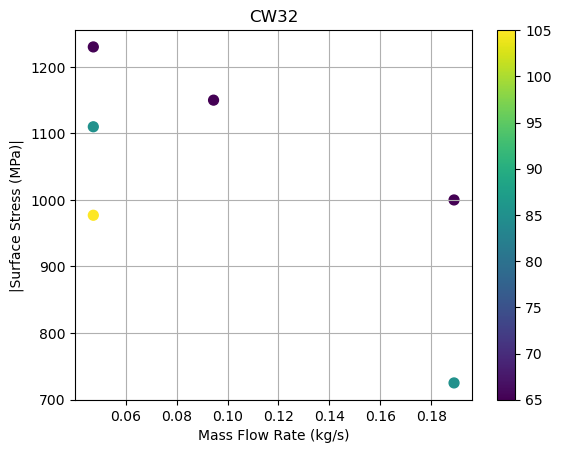

In [59]:

plt.scatter((CW32fits.Flowrate),abs(CW32fits.SurfStress),s=50, c=CW32fits.Velo, cmap="viridis")
plt.colorbar()
plt.grid()
plt.xlabel('Mass Flow Rate (kg/s)')
plt.ylabel('|Surface Stress (MPa)|')
plt.title('CW32')


In [78]:
S230_WM_90_densityplt=impactdensity("S230_Proxy_0945_20_49100_65000_90")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


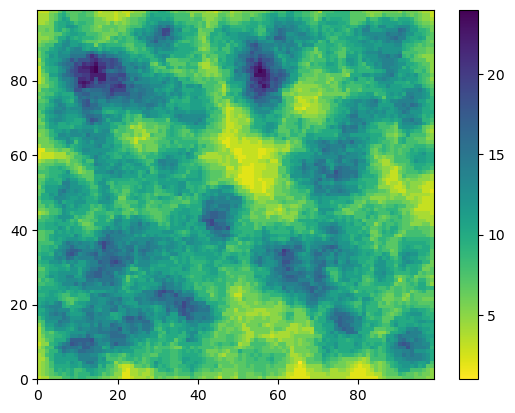

In [79]:
plt.pcolormesh(S230_WM_90_densityplt, cmap='viridis_r', )
plt.colorbar()